# Data Analysis for Litter Index and Census (Population)

- **Research Question:** What is the correlation between population and the litter index in Philadelphia?

- **Hypothesis:** An area’s litter index is likely higher if the location is more densely populated.

- In this notebook, we will analyze the relationship between Philadelphia's population and litter index.

## Set up

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore')

## Opening Litter Index and Cleaning Up Data

In [2]:
litter_index = pd.read_csv('../data/litter_index.csv')

In [3]:
litter_index

,OBJECTID,SEG_ID,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR,Shape__Length
0,1,521289,2.000000,1900 INGERSOLL ST,2018,5,Local,YELLOW,353.430892
1,2,521255,2.000000,1800 MASTER ST,2018,4,Collector,YELLOW,449.994425
2,3,420128,1.333333,1800 W STILES ST,2018,5,Local,GREEN,137.701612
3,4,420127,2.000000,1200 N 18TH ST,2018,4,Collector,YELLOW,142.859613
4,5,421610,2.000000,1200 N 20TH ST,2018,4,Collector,YELLOW,183.767439
...,...,...,...,...,...,...,...,...,...
79598,79599,600718,1.333333,0 LEVERINGTON AVE,2017,5,Local,GREEN,115.132244
79599,79600,543785,0.000000,1700 N DELAWARE AVE,2017,3,Minor Arterial,GREY,195.655423
79600,79601,1080636,1.333333,12600 NANTON DR,2017,4,Collector,GREEN,140.685545
79601,79602,880684,1.333333,4800 GRANT AVE,2017,2,Major Arterial,GREEN,159.615075


In [4]:
litter_index.shape

(79603, 9)

In [5]:
litter_index.sample(10)

,OBJECTID,SEG_ID,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR,Shape__Length
32887,32888,423267,1.333333,4400 ASPEN ST,2018,5,Local,GREEN,93.464079
5547,5548,520471,2.666667,2200 TURNER ST,2018,5,Local,ORANGE,455.315803
70272,70273,860497,2.000000,7300 CASTOR AVE,2017,3,Minor Arterial,YELLOW,833.107834
53823,53824,341738,2.000000,2300 S 7TH ST,2017,4,Collector,YELLOW,164.523439
49257,49258,300081,2.000000,600 S 60TH ST,2017,4,Collector,YELLOW,268.960596
51415,51416,320583,3.000000,5400 PASCHALL AVE,2017,5,Local,RED,160.600186
11268,11269,100075,1.333333,8400 LYONS PL,2018,5,Local,GREEN,1124.966652
16540,16541,980530,1.333333,10000 HEGERMAN ST,2018,5,Local,GREEN,556.078969
26709,26710,860043,1.333333,1800 GRIFFITH ST,2018,5,Local,GREEN,696.528981
70656,70657,741053,1.666667,800 PRATT ST,2017,4,Collector,GREEN,183.871628


In [6]:
litter_index.head(10)

,OBJECTID,SEG_ID,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR,Shape__Length
0,1,521289,2.000000,1900 INGERSOLL ST,2018,5,Local,YELLOW,353.430892
1,2,521255,2.000000,1800 MASTER ST,2018,4,Collector,YELLOW,449.994425
2,3,420128,1.333333,1800 W STILES ST,2018,5,Local,GREEN,137.701612
3,4,420127,2.000000,1200 N 18TH ST,2018,4,Collector,YELLOW,142.859613
4,5,421610,2.000000,1200 N 20TH ST,2018,4,Collector,YELLOW,183.767439
5,6,421601,1.333333,1900 W GIRARD AVE,2018,2,Major Arterial,GREEN,447.178485
6,7,421591,1.333333,1200 N 19TH ST,2018,4,Collector,GREEN,334.387166
7,8,420126,1.333333,1800 W STILES ST,2018,5,Local,GREEN,306.818627
8,9,420119,2.666667,1900 RIDGE AVE,2018,3,Minor Arterial,ORANGE,365.251515
9,10,420118,1.333333,1200 N 19TH ST,2018,4,Collector,GREEN,149.744816


In [7]:
# Remove unnecessary columns and keep the ones we need
copy0_df = ['HUNDRED_BLOCK_SCORE', 'LR_HUNDRED_BLOCK', 'YEAR', 'STREET_CLASS', 'STREET_CLASS_NAME', 'SCORE_COLOR']
litter_index= litter_index[copy0_df].copy()
litter_index

,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR
0,2.000000,1900 INGERSOLL ST,2018,5,Local,YELLOW
1,2.000000,1800 MASTER ST,2018,4,Collector,YELLOW
2,1.333333,1800 W STILES ST,2018,5,Local,GREEN
3,2.000000,1200 N 18TH ST,2018,4,Collector,YELLOW
4,2.000000,1200 N 20TH ST,2018,4,Collector,YELLOW
...,...,...,...,...,...,...
79598,1.333333,0 LEVERINGTON AVE,2017,5,Local,GREEN
79599,0.000000,1700 N DELAWARE AVE,2017,3,Minor Arterial,GREY
79600,1.333333,12600 NANTON DR,2017,4,Collector,GREEN
79601,1.333333,4800 GRANT AVE,2017,2,Major Arterial,GREEN


We can see here that lower the 'HUNDRED_BLOCK_SCORE', the cleaner the street as it indicates less litter by 'SCORE_COLOR'.

In [8]:
sorted_highest_litter = litter_index.sort_values(by='HUNDRED_BLOCK_SCORE', ascending=False)
sorted_highest_litter.head(10)

,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR
3844,4.0,0/400 W ROOSEVELT BLVD,2018,2,Major Arterial,MAROON
70972,4.0,4500 N 9TH ST,2017,3,Minor Arterial,MAROON
10284,4.0,1000 W ORLEANS ST,2018,5,Local,MAROON
29785,4.0,3700 FAIRMOUNT AVE,2018,4,Collector,MAROON
29786,4.0,600 N 36TH ST,2018,4,Collector,MAROON
70967,4.0,4400 N 9TH ST,2017,3,Minor Arterial,MAROON
77974,4.0,4400 CASTOR AVE,2017,2,Major Arterial,MAROON
10282,4.0,2900 N 11TH ST,2018,4,Collector,MAROON
10281,4.0,2900 N 11TH ST,2018,4,Collector,MAROON
10280,4.0,2900 N 11TH ST,2018,4,Collector,MAROON


These are the places with 4.0 as the litter index.

In [9]:
sorted_lowest_litter = litter_index.sort_values(by='HUNDRED_BLOCK_SCORE', ascending=True)
sorted_lowest_litter.head(10)

,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR
71065,0.0,1700 N DELAWARE AVE,2017,3,Minor Arterial,GREY
74708,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
74709,0.0,0 BROOKSHIRE LN,2017,5,Local,GREY
74710,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
61996,0.0,0 RED LION RD,2017,3,Minor Arterial,GREY
61997,0.0,0 RED LION RD,2017,3,Minor Arterial,GREY
74711,0.0,0 BROOKSHIRE CT,2017,5,Local,GREY
74712,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
74713,0.0,0 BROOKSHIRE DR,2017,5,Local,GREY
74714,0.0,0 BROOKSHIRE PL,2017,5,Local,GREY


These are the places with 0 as the litter index.

## Opening Census and Cleaning Up Data

Even though the census data is from 2010 and Litter Index data is from 2017 and 2018, the best fitting population data with the litter index data we could find was from 2010, so we decided to use this data.

In [10]:
census = pd.read_csv('../data/census.csv')

In [11]:
census

,OBJECTID,GEOGRAPHY_NAME,YEAR,GEOGRAPHY,COUNT_ALL_RACES_ETHNICITIES,COUNT_ASIAN_PI_NH,COUNT_BLACK_NH,COUNT_HISPANIC,COUNT_MULTIRACIAL_NH,COUNT_WHITE_NH,PERCENT_ASIAN_PI_NH,PERCENT_BLACK_NH,PERCENT_HISPANIC,PERCENT_MULTIRACIAL_NH,PERCENT_WHITE_NH,Shape__Area,Shape__Length
0,1,42101000100,2010,Census tract,3478,175,207,126,70,2890,5.031627,5.951696,3.622772,2.012651,83.093732,1.202257e+06,4528.078584
1,2,42101000200,2010,Census tract,2937,1856,284,79,41,665,63.193735,9.669731,2.689820,1.395982,22.642152,6.516548e+05,3688.958965
2,3,42101000300,2010,Census tract,3169,329,324,135,80,2290,10.381824,10.224045,4.260019,2.524456,72.262543,9.319655e+05,5040.148986
3,4,42101000401,2010,Census tract,2125,519,376,107,63,1049,24.423529,17.694118,5.035294,2.964706,49.364706,3.978075e+05,2733.448537
4,5,42101000402,2010,Census tract,3142,360,173,109,34,2455,11.457670,5.506047,3.469128,1.082113,78.134946,5.174244e+05,3547.054900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,380,42101980600,2010,Census tract,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2.189298e+06,8458.210568
380,381,42101980700,2010,Census tract,5,1,3,1,0,0,20.000000,60.000000,20.000000,0.000000,0.000000,1.278467e+07,19411.710980
381,382,42101980800,2010,Census tract,6,0,1,0,1,4,0.000000,16.666667,0.000000,16.666667,66.666667,3.700755e+06,16463.167578
382,383,42101980900,2010,Census tract,30,0,18,2,1,9,0.000000,60.000000,6.666667,3.333333,30.000000,3.498002e+07,40164.961498


In [12]:
census.shape

(384, 17)

In [13]:
census.head(10)

,OBJECTID,GEOGRAPHY_NAME,YEAR,GEOGRAPHY,COUNT_ALL_RACES_ETHNICITIES,COUNT_ASIAN_PI_NH,COUNT_BLACK_NH,COUNT_HISPANIC,COUNT_MULTIRACIAL_NH,COUNT_WHITE_NH,PERCENT_ASIAN_PI_NH,PERCENT_BLACK_NH,PERCENT_HISPANIC,PERCENT_MULTIRACIAL_NH,PERCENT_WHITE_NH,Shape__Area,Shape__Length
0,1,42101000100,2010,Census tract,3478,175,207,126,70,2890,5.031627,5.951696,3.622772,2.012651,83.093732,1.202257e+06,4528.078584
1,2,42101000200,2010,Census tract,2937,1856,284,79,41,665,63.193735,9.669731,2.689820,1.395982,22.642152,6.516548e+05,3688.958965
2,3,42101000300,2010,Census tract,3169,329,324,135,80,2290,10.381824,10.224045,4.260019,2.524456,72.262543,9.319655e+05,5040.148986
3,4,42101000401,2010,Census tract,2125,519,376,107,63,1049,24.423529,17.694118,5.035294,2.964706,49.364706,3.978075e+05,2733.448537
4,5,42101000402,2010,Census tract,3142,360,173,109,34,2455,11.457670,5.506047,3.469128,1.082113,78.134946,5.174244e+05,3547.054900
5,6,42101000500,2010,Census tract,2329,342,870,306,47,750,14.684414,37.355088,13.138686,2.018033,32.202662,7.305425e+05,4003.465718
6,7,42101000600,2010,Census tract,1781,160,253,142,65,1151,8.983717,14.205503,7.973049,3.649635,64.626614,2.941621e+05,3081.855197
7,8,42101000700,2010,Census tract,3082,463,281,142,73,2112,15.022713,9.117456,4.607398,2.368592,68.526931,4.364415e+05,4354.051434
8,9,42101000801,2010,Census tract,1562,173,46,90,30,1219,11.075544,2.944942,5.761844,1.920615,78.040973,1.956526e+05,1876.825213
9,10,42101000803,2010,Census tract,3601,444,74,122,67,2891,12.329908,2.054985,3.387948,1.860594,80.283255,2.603530e+05,2194.660331


In [14]:
list(census.columns)

['OBJECTID',
 'GEOGRAPHY_NAME',
 'YEAR',
 'GEOGRAPHY',
 'COUNT_ALL_RACES_ETHNICITIES',
 'COUNT_ASIAN_PI_NH',
 'COUNT_BLACK_NH',
 'COUNT_HISPANIC',
 'COUNT_MULTIRACIAL_NH',
 'COUNT_WHITE_NH',
 'PERCENT_ASIAN_PI_NH',
 'PERCENT_BLACK_NH',
 'PERCENT_HISPANIC',
 'PERCENT_MULTIRACIAL_NH',
 'PERCENT_WHITE_NH',
 'Shape__Area',
 'Shape__Length']

We decided to focus on the overall population, Asian population, African American population, Hispanic population and White population as multiracial didn't indicate what races in particular were mixed.

In [15]:
#Remove unnecessary columns and keep the ones we need
copy1_df = ['COUNT_ALL_RACES_ETHNICITIES', 'COUNT_ASIAN_PI_NH', 'COUNT_BLACK_NH', 'COUNT_HISPANIC', 'COUNT_WHITE_NH']
census = census[copy1_df].copy()
census

,COUNT_ALL_RACES_ETHNICITIES,COUNT_ASIAN_PI_NH,COUNT_BLACK_NH,COUNT_HISPANIC,COUNT_WHITE_NH
0,3478,175,207,126,2890
1,2937,1856,284,79,665
2,3169,329,324,135,2290
3,2125,519,376,107,1049
4,3142,360,173,109,2455
...,...,...,...,...,...
379,0,0,0,0,0
380,5,1,3,1,0
381,6,0,1,0,4
382,30,0,18,2,9


In [16]:
# Calculating population distribution by races
total_asian = census['COUNT_ASIAN_PI_NH'].sum()
total_black = census['COUNT_BLACK_NH'].sum()
total_hispanic = census['COUNT_HISPANIC'].sum()
total_white = census['COUNT_WHITE_NH'].sum()
total_pop = census['COUNT_ALL_RACES_ETHNICITIES'].sum()
ratio_asian = total_asian/total_pop
ratio_black = total_black/total_pop
ratio_white = total_white/total_pop
ratio_hispanic = total_hispanic/total_pop
print(f'Asians: {ratio_asian:.2f}')
print(f'African Americans: {ratio_black:.2f}')
print(f'Hispanics: {ratio_hispanic:.2f}')
print(f'Whites: {ratio_white:.2f}')

Asians: 0.06
African Americans: 0.42
Hispanics: 0.12
Whites: 0.37


As we can see here, African Americans have the highest population ratio with the second highest being the white population and Asians having the lowest population ratio in Philadelphia.

## Opening Litter Index, Census, and Philadelphia Neighborhood geoJson

In [17]:
census_gdf=gpd.read_file('../data/census.geojson')

In [18]:
census_gdf.head(5)

,OBJECTID,GEOGRAPHY_NAME,YEAR,GEOGRAPHY,COUNT_ALL_RACES_ETHNICITIES,COUNT_ASIAN_PI_NH,COUNT_BLACK_NH,COUNT_HISPANIC,COUNT_MULTIRACIAL_NH,COUNT_WHITE_NH,PERCENT_ASIAN_PI_NH,PERCENT_BLACK_NH,PERCENT_HISPANIC,PERCENT_MULTIRACIAL_NH,PERCENT_WHITE_NH,Shape__Area,Shape__Length,geometry
0,1,42101000100,2010,Census tract,3478,175,207,126,70,2890,5.031627,5.951696,3.622772,2.012651,83.093732,1.202257e+06,4528.078584,"POLYGON ((-75.14147 39.95171, -75.14150 39.951..."
1,2,42101000200,2010,Census tract,2937,1856,284,79,41,665,63.193735,9.669731,2.689820,1.395982,22.642152,6.516548e+05,3688.958965,"POLYGON ((-75.16238 39.95765, -75.16236 39.957..."
2,3,42101000300,2010,Census tract,3169,329,324,135,80,2290,10.381824,10.224045,4.260019,2.524456,72.262543,9.319655e+05,5040.148986,"POLYGON ((-75.17820 39.95981, -75.17743 39.959..."
3,4,42101000401,2010,Census tract,2125,519,376,107,63,1049,24.423529,17.694118,5.035294,2.964706,49.364706,3.978075e+05,2733.448537,"POLYGON ((-75.17299 39.95464, -75.17301 39.954..."
4,5,42101000402,2010,Census tract,3142,360,173,109,34,2455,11.457670,5.506047,3.469128,1.082113,78.134946,5.174244e+05,3547.054900,"POLYGON ((-75.16333 39.95334, -75.16340 39.953..."


In [19]:
neighborhood=gpd.read_file('../data/Neighborhoods_Philadelphia.geojson')

In [20]:
neighborhood

,name,listname,mapname,shape_leng,shape_area,cartodb_id,created_at,updated_at,geometry
0,PENNYPACK_PARK,Pennypack Park,Pennypack Park,87084.285589,6.014076e+07,9,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.05645 40.08743, -75.05667 ..."
1,OVERBROOK,Overbrook,Overbrook,57004.924607,7.692499e+07,138,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.22719 39.97740, -75.22984 ..."
2,GERMANTOWN_SOUTHWEST,"Germantown, Southwest",Southwest Germantown,14880.743608,1.441867e+07,59,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.16208 40.02829, -75.16145 ..."
3,EAST_PARKSIDE,East Parkside,East Parkside,10885.781535,4.231000e+06,129,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.19931 39.97462, -75.19869 ..."
4,GERMANY_HILL,Germany Hill,Germany Hill,13041.939087,6.949968e+06,49,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.22722 40.03523, -75.22865 ..."
...,...,...,...,...,...,...,...,...,...
153,NAVY_YARD,Navy Yard,Navy Yard,42694.549644,8.018157e+07,149,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.17343 39.89710, -75.17096 ..."
154,EAST_KENSINGTON,East Kensington,East Kensington,11570.514789,7.672347e+06,150,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.12025 39.98476, -75.12154 ..."
155,ELMWOOD,Elmwood,Elmwood,23215.724521,2.190144e+07,151,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.21769 39.92732, -75.22628 ..."
156,GIRARD_ESTATES,Girard Estates,Girard Estates,17375.972450,1.792621e+07,152,2013-03-19 17:41:50.508000+00:00,2013-03-19 17:41:50.743000+00:00,"MULTIPOLYGON (((-75.18694 39.92232, -75.18344 ..."


As there are 158 different neighborhoods and the litter index is not mapped to neighborhoods specifically, we will use the neighborhoods to see which neighborhood areas of Philadelphia using longitude and latitude are more affected.

In [21]:
litter_gdf=gpd.read_file('../data/litter_index.geojson')

In [22]:
litter_gdf.head(5)

,OBJECTID,SEG_ID,HUNDRED_BLOCK_SCORE,LR_HUNDRED_BLOCK,YEAR,STREET_CLASS,STREET_CLASS_NAME,SCORE_COLOR,Shape__Length,geometry
0,1,521289,2.000000,1900 INGERSOLL ST,2018,5,Local,YELLOW,353.430892,"LINESTRING (-75.16690 39.97489, -75.16815 39.9..."
1,2,521255,2.000000,1800 MASTER ST,2018,4,Collector,YELLOW,449.994425,"LINESTRING (-75.16519 39.97531, -75.16677 39.9..."
2,3,420128,1.333333,1800 W STILES ST,2018,5,Local,GREEN,137.701612,"LINESTRING (-75.16565 39.97323, -75.16614 39.9..."
3,4,420127,2.000000,1200 N 18TH ST,2018,4,Collector,YELLOW,142.859613,"LINESTRING (-75.16565 39.97323, -75.16557 39.9..."
4,5,421610,2.000000,1200 N 20TH ST,2018,4,Collector,YELLOW,183.767439,"LINESTRING (-75.16900 39.97271, -75.16888 39.9..."


## Plotting Litter Index and Overall Population in Philadelphia by Neighborhood

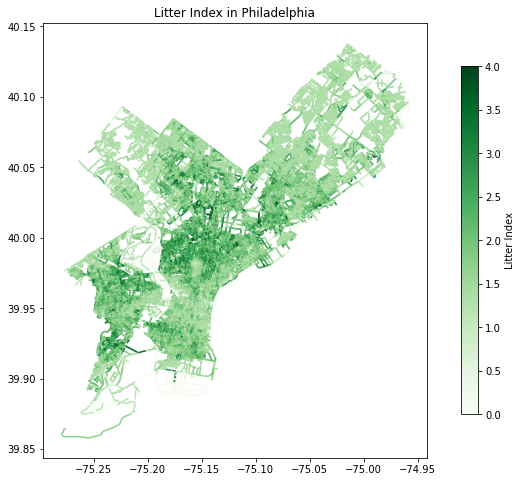

In [23]:
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', figsize=(12, 8), alpha=0.8, legend=True, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })
plt.title('Litter Index in Philadelphia')
plt.show()

Observation
- The area with high litter index is mainly the central area of Philadelphia. It is also evident that the Western and Northern parts of Philadelphia have a relatively lower litter index score, indicating that these areas are cleaner. Southern tip of Philadelphia is also has relatively low litter index.

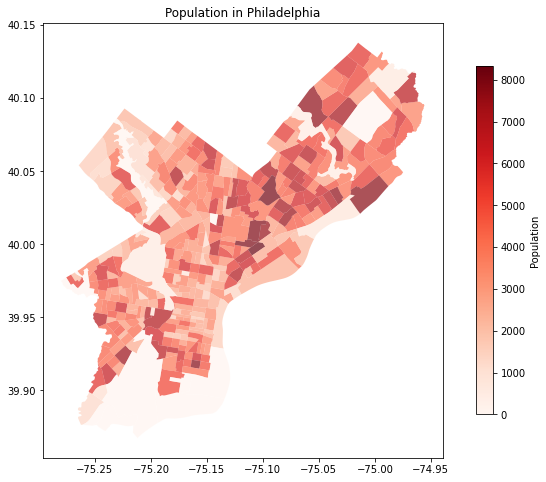

In [24]:
population_plot = census_gdf.plot(column='COUNT_ALL_RACES_ETHNICITIES', cmap='Reds', figsize=(12, 8), alpha=0.7, legend=True, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Population'
                      })
plt.title('Population in Philadelphia')
plt.show()

Observation
- It is evident that the upper central part and Northeastern of Philadelphia is more densely populated, while the lower part of the city has fewer population in general.

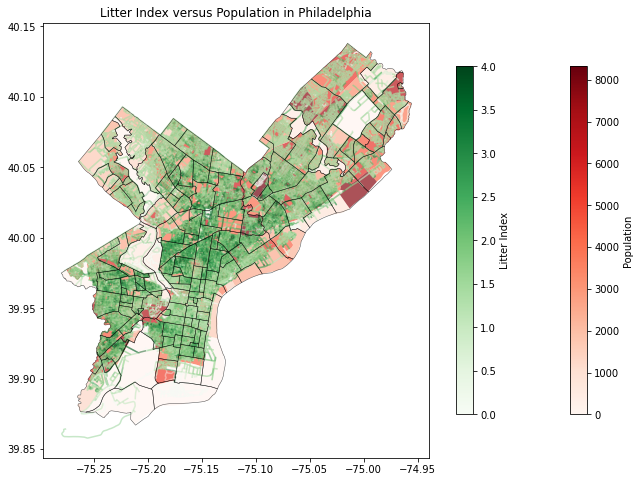

In [25]:
# Checking and match CRS to make sure the mapping is the same
if litter_gdf.crs != census_gdf.crs:
    census_gdf = census_gdf.to_crs(litter_gdf.crs)

# Plotting the litter data with a color scale legend
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotting census data with a different colormap
population_plot = census_gdf.plot(column='COUNT_ALL_RACES_ETHNICITIES', cmap='Reds', alpha=0.7, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Population'
                      })

# Plotting litter data
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', alpha=0.4, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })

# Plotting neighborhood boundaries
neighborhood.boundary.plot(color='black', ax=ax, alpha=0.7, linewidth=0.5)

plt.title('Litter Index versus Population in Philadelphia')
plt.show()

Observation
- It seems as that there are no significant correlations in the level of the litter index and the population of an area. However, it should be noted that in the case that a neighborhood consists of high population, it is more likely for the area to have a higher litter index than a lower litter index, with one exception of a neighborhood called Holmesburg in Northeastern Philadelphia. While highly populated areas are covered with darker shades of green, Holmesburg shows high population density, but is not colored with a lot of green.

## Plotting Litter Index and Asian Population in Philadelphia by Neighborhood

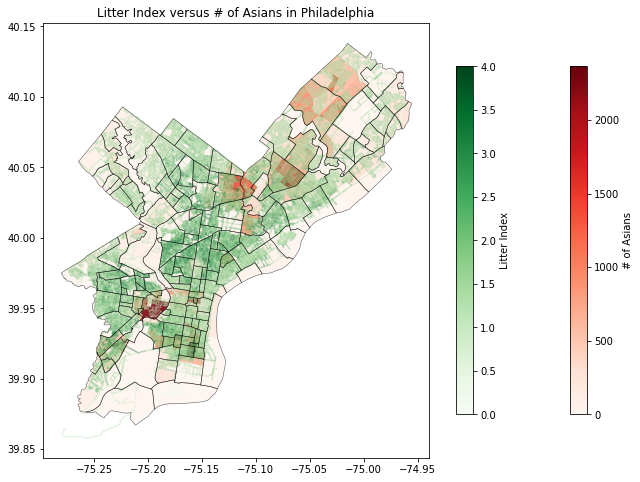

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
asian_plot = census_gdf.plot(column='COUNT_ASIAN_PI_NH', cmap='Reds', alpha=0.9, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': '# of Asians'
                      })
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', alpha=0.2, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })
neighborhood.boundary.plot(color='black', ax=ax, alpha=0.7, linewidth=0.5)

plt.title('Litter Index versus # of Asians in Philadelphia')
plt.show()

Observation
- The map indicates that neighborhoods with high Asian population have lower litter index.

## Plotting Litter Index and African American Population in Philadelphia by Neighborhood

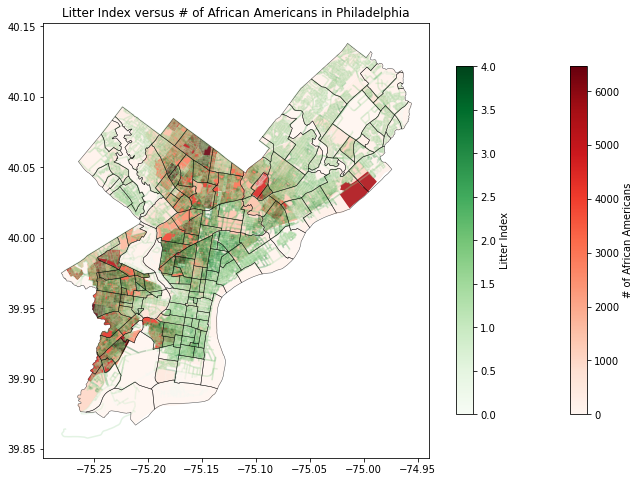

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
black_plot = census_gdf.plot(column='COUNT_BLACK_NH', cmap='Reds', alpha=0.9, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': '# of African Americans'
                      })
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', alpha=0.2, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })
neighborhood.boundary.plot(color='black', ax=ax, alpha=0.7, linewidth=0.5)

plt.title('Litter Index versus # of African Americans in Philadelphia')
plt.show()

Observation
- Areas where the population of African Americans, where they have the highest number of population in Philadelphia from our data, were high tended to have a higher litter index, indicating that these neighborhoods were more littered (except for Holmesburg). It is evident that most African Americans live in the Southwest and Northwest side of Philadelphia, which are also areas with high litter index scores. 

## Plotting Litter Index and Hispanic Population in Philadelphia by Neighborhood

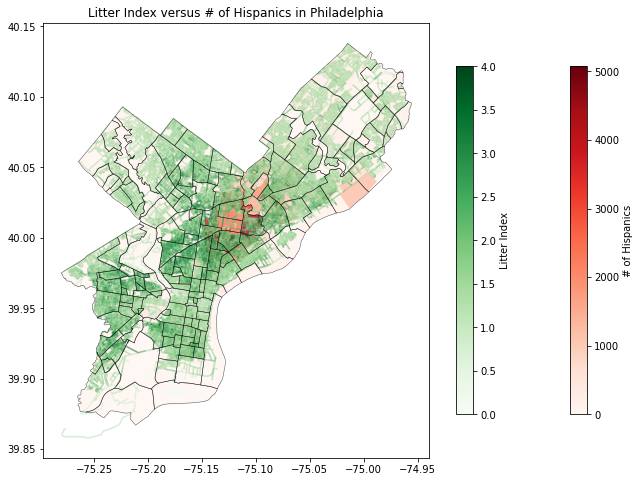

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
hispanic_plot = census_gdf.plot(column='COUNT_HISPANIC', cmap='Reds', alpha=0.8, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': '# of Hispanics'
                      })
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', alpha=0.3, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })
neighborhood.boundary.plot(color='black', ax=ax, alpha=0.7, linewidth=0.5)

plt.title('Litter Index versus # of Hispanics in Philadelphia')
plt.show()

Observation:
- This map shows Hispanic population (the third highest population ratio from our data) in Philadelphia. It is apparent that most Hispanics in Philadelphia tended to live in the central upper part of the city, which is also an area that had rather high litter index scores. However, the population of Hispanics is specifically in the areas of central upper parts of the city that has a lower litter index compared to the entire center city. 

## Plotting Litter Index and White Population in Philadelphia by Neighborhood

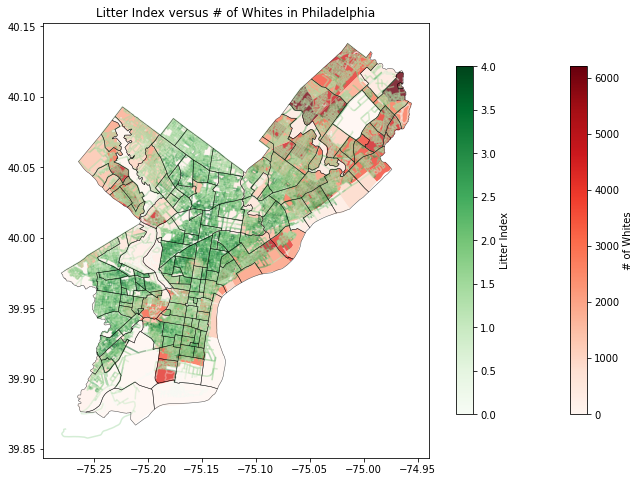

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
white_plot = census_gdf.plot(column='COUNT_WHITE_NH', cmap='Reds', alpha=0.8, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': '# of Whites'
                      })
litter_plot = litter_gdf.plot(column='HUNDRED_BLOCK_SCORE', cmap='Greens', alpha=0.3, legend=True, ax=ax, legend_kwds = {
                        'shrink': 0.8,
                        'label': 'Litter Index'
                      })
neighborhood.boundary.plot(color='black', ax=ax, alpha=0.7, linewidth=0.5)

plt.title('Litter Index versus # of Whites in Philadelphia')
plt.show()

Observation
- The white population is rather sparsely spread out throughout Philadelphia, especially concentrated in Northeastern Philadelphia. Comparing the distribution of the white population and the litter index, it seems that the neighborhoods with high White population also correlates to lower litter index, despite the white population being the second highest number of population in Philadelphia from our data. 